In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [2]:
data_train = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
data_test = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')

In [3]:
out_sample = pd.read_csv('../input/house-prices-advanced-regression-techniques/sample_submission.csv')

In [4]:
data_train['SalePrice'].describe().transpose()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

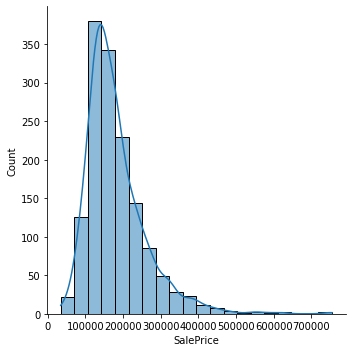

Sale Price skewness: 1.8828757597682129


In [5]:
sns.displot(data_train['SalePrice'], kde=True, bins=20)
plt.show()
print('Sale Price skewness:', data_train['SalePrice'].skew())

In [6]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
data_train_num = data_train.select_dtypes(exclude='object')
data_train_num.shape

(1460, 38)

In [8]:
corr = data_train_num.corr()
corr_target =corr['SalePrice']
corr_target.sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

In [9]:
corr_target = corr_target[corr_target>0.5]
corr_target.sort_values(ascending=False)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64

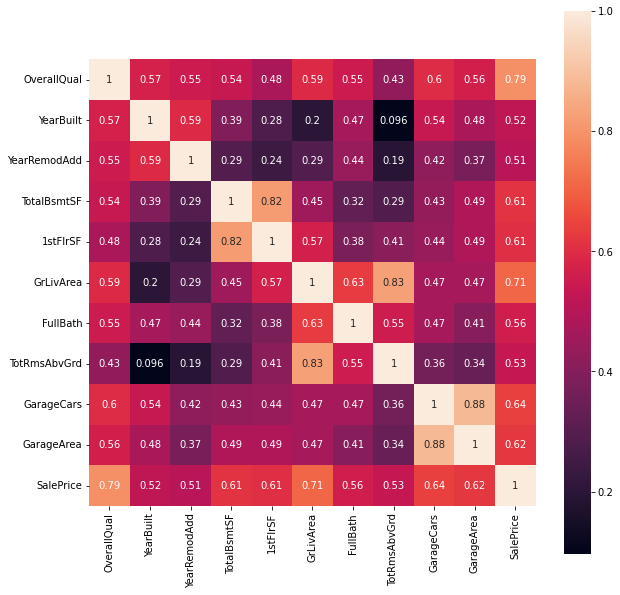

In [10]:
col_name = corr_target.keys()
corr_map = data_train_num[col_name].corr()
corr_map
plt.figure(figsize=(10,10))
sns.heatmap(corr_map, square=True, annot=True)
plt.show()

In [11]:
col_name = ['OverallQual', 'YearBuilt', 'YearRemodAdd', 'FullBath', '1stFlrSF', 'GrLivArea', 'GarageCars', 'SalePrice']
data_train[col_name].isnull().sum()

OverallQual     0
YearBuilt       0
YearRemodAdd    0
FullBath        0
1stFlrSF        0
GrLivArea       0
GarageCars      0
SalePrice       0
dtype: int64

In [12]:
new_data = data_train[col_name]

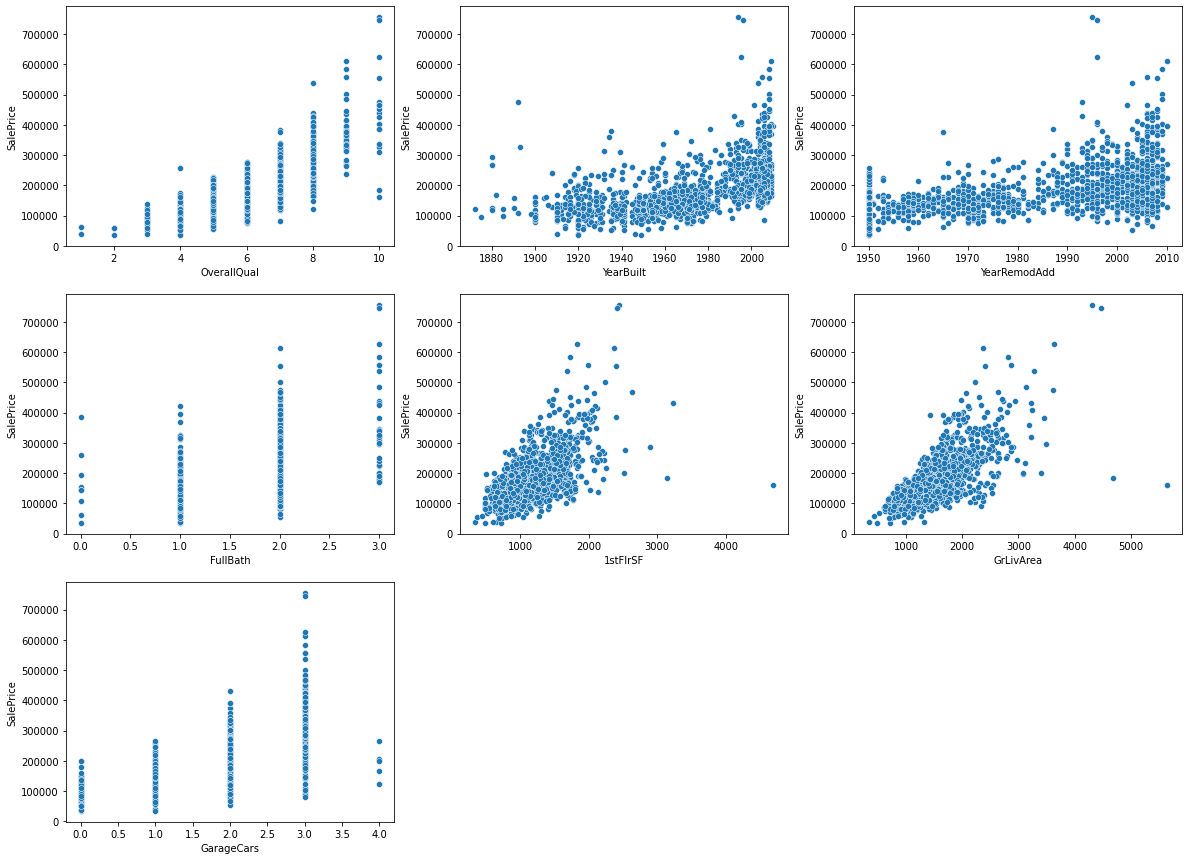

In [13]:
plt.figure(figsize=(20,15))

plt.subplot(3,3,1)
sns.scatterplot(x=new_data['OverallQual'], y=new_data['SalePrice'])

plt.subplot(3,3,2)
sns.scatterplot(x=new_data['YearBuilt'], y=new_data['SalePrice'])

plt.subplot(3,3,3)
sns.scatterplot(x=new_data['YearRemodAdd'], y=new_data['SalePrice'])

plt.subplot(3,3,4)
sns.scatterplot(x=new_data['FullBath'], y=new_data['SalePrice'])

plt.subplot(3,3,5)
sns.scatterplot(x=new_data['1stFlrSF'], y=new_data['SalePrice'])

plt.subplot(3,3,6)
sns.scatterplot(x=new_data['GrLivArea'], y=new_data['SalePrice'])

plt.subplot(3,3,7)
sns.scatterplot(x=new_data['GarageCars'], y=new_data['SalePrice'])

plt.show()

In [14]:
new_data[new_data['GrLivArea'] > 4000]

,OverallQual,YearBuilt,YearRemodAdd,FullBath,1stFlrSF,GrLivArea,GarageCars,SalePrice
523,10,2007,2008,3,3138,4676,3,184750
691,10,1994,1995,3,2444,4316,3,755000
1182,10,1996,1996,3,2411,4476,3,745000
1298,10,2008,2008,2,4692,5642,2,160000


In [15]:
new_data.drop(new_data[new_data['GrLivArea'] > 4000].index, inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


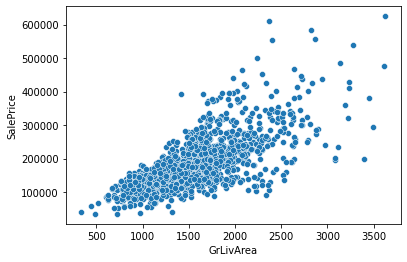

In [16]:
sns.scatterplot(x=new_data['GrLivArea'], y=new_data['SalePrice'])
plt.show()

In [17]:
X_train = new_data.drop(['SalePrice'], axis=1)
X_train

,OverallQual,YearBuilt,YearRemodAdd,FullBath,1stFlrSF,GrLivArea,GarageCars
0,7,2003,2003,2,856,1710,2
1,6,1976,1976,2,1262,1262,2
2,7,2001,2002,2,920,1786,2
3,7,1915,1970,1,961,1717,3
4,8,2000,2000,2,1145,2198,3
...,...,...,...,...,...,...,...
1455,6,1999,2000,2,953,1647,2
1456,6,1978,1988,2,2073,2073,2
1457,7,1941,2006,2,1188,2340,1
1458,5,1950,1996,1,1078,1078,1


In [18]:
Y_train = new_data['SalePrice']
Y_train

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1456, dtype: int64

In [19]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.3, random_state=101)

In [20]:
lr = LinearRegression()
lr.fit(X_train, Y_train)
Y_predict = lr.predict(X_val)
np.sqrt(mean_squared_error(Y_val, Y_predict))

33307.02571907529

In [21]:
X_test = data_test[['OverallQual', 'YearBuilt', 'YearRemodAdd', 'FullBath', '1stFlrSF', 'GrLivArea', 'GarageCars']]

In [22]:
X_test.isnull().sum()

OverallQual     0
YearBuilt       0
YearRemodAdd    0
FullBath        0
1stFlrSF        0
GrLivArea       0
GarageCars      1
dtype: int64

In [23]:
values = {'GarageCars' : X_test['GarageCars'].median()}
X_test.fillna(values, inplace=True)
X_test.isnull().sum()

/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


OverallQual     0
YearBuilt       0
YearRemodAdd    0
FullBath        0
1stFlrSF        0
GrLivArea       0
GarageCars      0
dtype: int64

In [24]:
Y_test = lr.predict(X_test)

In [25]:
submission = pd.DataFrame({'Id' : data_test['Id'], 'SalePrice': Y_test})
submission.to_csv('./mysubmission.csv', index=False)